In [1]:
# Importing Relevant Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime as dt
import numpy as np


cdcPath = "../../../COVID-19_Case_Surveillance_Public_Use_Data.csv"

In [2]:
# Create data frame from CSV file variable(path) using pandas .read_csv() method
cdcDf = pd.read_csv(cdcPath, low_memory=False)

# Print out first 10 rows for inspection
cdcDf.head(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
5,2020/11/17,2020/11/10,2020/11/08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
6,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
7,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
8,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
9,2020/11/17,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing


In [3]:
# Dropping unnecessary columns
cutCdcDf = cdcDf.drop(['pos_spec_dt', 'onset_dt','icu_yn','death_yn'], axis=1)

In [4]:
# Checking values in Race and Ethnicity to identify possible invalid/missing values 
cdcDf['Race and ethnicity (combined)'].value_counts()

Unknown                                                 2781176
White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

In [5]:
# Dropping missing or unknown data using conditional formatting
ethUnkDf = cutCdcDf[(cutCdcDf['Race and ethnicity (combined)'] != 'Missing') &
                    (cutCdcDf['Race and ethnicity (combined)'] != 'Unknown') ]
ethUnkDf.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [6]:
# Re-Checking values in Race and Ethnicity for conditional formatting accuracy
ethUnkDf['Race and ethnicity (combined)'].value_counts()

White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

In [7]:
# Checking values in the Age Groups
ethUnkDf['age_group'].value_counts()

20 - 29 Years    951360
30 - 39 Years    799407
40 - 49 Years    742803
50 - 59 Years    727465
60 - 69 Years    531308
10 - 19 Years    503431
70 - 79 Years    316264
80+ Years        254563
0 - 9 Years      185198
Unknown           10507
Name: age_group, dtype: int64

In [8]:
# Dropping unknown values from the age groups
unkAgeDf = ethUnkDf[ethUnkDf['age_group'] != 'Unknown']

# Checking for accuracy (removable)
##unkAgeDf['age_group'].value_counts()
unkAgeDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
5,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
6,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing
7,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing
8,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown
9,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing


In [9]:
# Checking hospitilization values
unkAgeDf['hosp_yn'].value_counts()

No         2591276
Missing    1556663
Unknown     443552
Yes         420386
Name: hosp_yn, dtype: int64

In [10]:
# Dropping missing and unknown values from hospitilization
misHospDf = unkAgeDf[(unkAgeDf['hosp_yn'] != 'Missing') &
                     (unkAgeDf['hosp_yn'] != 'Unknown')]

misHospDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
6,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
13,2020/11/15,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing
14,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
16,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
23,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [11]:
# Checking values for medical conditions
misHospDf['medcond_yn'].value_counts()

Missing    1811865
Yes         579151
No          459692
Unknown     160954
Name: medcond_yn, dtype: int64

In [12]:
# Dropping missing and unknown values from conditions
misMedDf = misHospDf[(misHospDf['medcond_yn'] != 'Missing') &
                     (misHospDf['medcond_yn'] != 'Unknown')]

misMedDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
14,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
16,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
23,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
29,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
34,2020/11/02,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [13]:
# Checking values in the sex column
misMedDf['sex'].value_counts()

Female     550587
Male       483751
Unknown      3403
Missing      1010
Other          83
Name: sex, dtype: int64

In [14]:
# Removing missing and unknown values from the sex column
misSexDf = misMedDf[(misMedDf['sex'] != 'Missing') &
                    (misMedDf['sex'] != 'Unknown') &
                    (misMedDf['sex'] != 'Other') ]

misSexDf.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No


In [15]:
# Checking values in the status column
misSexDf['current_status'].value_counts()

Laboratory-confirmed case    991896
Probable Case                 42451
Name: current_status, dtype: int64

In [16]:
# Removing non-laboratory confirmed cases
cleanCdcDf = misSexDf[misSexDf['current_status'] != 'Probable Case']
cleanCdcDf.head(10)

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
11,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
14,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
16,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
23,2020/11/17,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
29,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
34,2020/11/02,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes


In [17]:
# Renaming Column Headers for Visualization and Analyis Purposes
rnCdcDf = cleanCdcDf.rename(columns={"cdc_report_dt": "CDC Report Date",
                                     "current_status": "Covid Status",
                                     "sex": "Gender",
                                     "age_group": "Age Group",
                                     "Race and ethnicity (combined)": "Race/Ethnicity",
                                     "hosp_yn": "Hospitalized",
                                     "medcond_yn": "Pre-Existing Condition"})


sorted_CdcDf = rnCdcDf.sort_values("CDC Report Date", ascending=True)
sorted_CdcDf.head(10)

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
6853012,2020/01/01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Yes
2155067,2020/01/01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,No
2819969,2020/01/02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Yes
2554264,2020/01/09,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No
3311685,2020/01/11,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes
2272094,2020/01/12,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",Yes,Yes
3199813,2020/01/13,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Yes,Yes
3781248,2020/01/13,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Yes
3265160,2020/01/15,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Yes
3322080,2020/01/16,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes


In [18]:
# Reset index and save to new variable
resetCdcDf = sorted_CdcDf.reset_index(drop=True)
resetCdcDf.head(10)

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
0,2020/01/01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Yes
1,2020/01/01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,No
2,2020/01/02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Yes
3,2020/01/09,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No
4,2020/01/11,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes
5,2020/01/12,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",Yes,Yes
6,2020/01/13,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Yes,Yes
7,2020/01/13,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Yes
8,2020/01/15,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Yes
9,2020/01/16,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes


In [19]:
# Convert Date column to correct "date" type
resetCdcDf['CDC Report Date'] = pd.to_datetime(resetCdcDf['CDC Report Date'], format= '%Y/%m/%d')

# Create new column for months of the date for grouping purposes and change to "numerical" type
resetCdcDf['CDC Report Month (#)'] = resetCdcDf['CDC Report Date'].dt.strftime('%m')
resetCdcDf['CDC Report Month (#)'] = pd.to_numeric(resetCdcDf['CDC Report Month (#)'])

# Create bins to aggregate the data into months and use pd.cut() method to bin the data into a new column
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November"]

resetCdcDf['CDC Report Month'] = pd.cut(resetCdcDf['CDC Report Month (#)'], bins, labels=months, include_lowest=False)
resetCdcDf.head()

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition,CDC Report Month (#),CDC Report Month
0,2020-01-01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Yes,1,January
1,2020-01-01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",Yes,No,1,January
2,2020-01-02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Yes,1,January
3,2020-01-09,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,1,January
4,2020-01-11,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Yes,1,January


In [47]:
# Create variable for refence when calling aggregates by Month
monthCdcDf = resetCdcDf.groupby("CDC Report Month")

# Below is simply an example, you can perform any aggregates youd like 
count_df = monthCdcDf.sum()
count_df['Cases Per Day'] = ""
count_df['Cases Per Day'] = [ round(28/31, 2), round(294/28, 2), round(90843/31, 2),
                             round(332736/30, 2), round(435255/31, 2), round(884196/30, 2),
                             round(1000902/31, 2), round(1028376/31, 2), round(942156/30, 2),
                             round(1423530/31, 2), round(1377959/19, 2) ]
count_df

,CDC Report Month (#),Cases Per Day
CDC Report Month,,
January,28,0.90
February,294,10.50
March,90843,2930.42
April,332736,11091.20
May,435255,14040.48
June,884196,29473.20
July,1000902,32287.16
August,1028376,33173.42
September,942156,31405.20


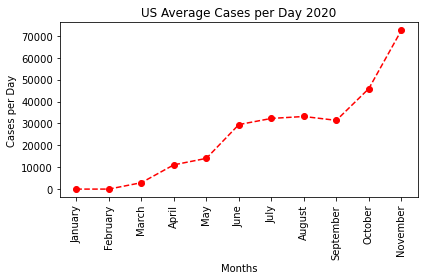

In [45]:
## Create a line graph based on the group series to track total cases over the period of the year 
# Set x-axis and tick locations
x_axis = np.arange(len(months))
tick_locations = [month for month in x_axis]

# Create line chart tracking the change in cases per day thorughout the year
avg_daily = count_df['Cases Per Day'] 
plt.plot(x_axis, avg_daily, color="red", marker="o", label="Cases per Day", linestyle="dashed")

# Set the labels, axes, and title
plt.xticks(tick_locations, months, rotation="vertical")
plt.title("US Average Cases per Day 2020")
plt.xlabel("Months")
plt.ylabel("Cases per Day")

plt.tight_layout()
plt.show()

In [43]:
## Need to split into two seperate dataframes as done with pre-medconditions vs hospitalization
# Data Frame Specific to the Analysis of Gender vs. Hospitalization Status 
patient_sex_df = resetCdcDf[["CDC Report Month", "Gender", "Hospitalized"]]
patient_sex_df.head()

,CDC Report Month,Gender,Hospitalized
0,January,Female,No
1,January,Male,Yes
2,January,Male,No
3,January,Female,No
4,January,Male,No


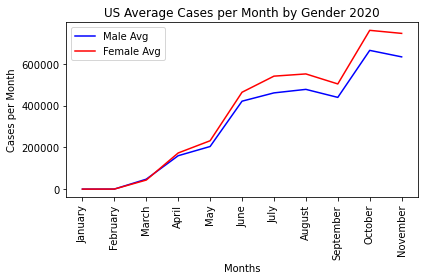

CDC Report Month (#)
CDC Report Month Gender                      
January          Female                    13
                 Male                      15
February         Female                   168
                 Male                     126
March            Female                 43344
                 Male                   47499
April            Female                172940
                 Male                  159796
May              Female                231395
                 Male                  203860
June             Female                463476
                 Male                  420708
July             Female                540505
                 Male                  460390
August           Female                551144
                 Male                  477232
September        Female                503226
                 Male                  438921
October          Female                759700
                 Male                  663820
November         Female                745140
                 Male                  632775

In [22]:
# Create a data frame grouped by Month and Gender
gender_month_df = resetCdcDf.groupby(["CDC Report Month", "Gender"])
gender_month_df.sum()
gender_avg = gender_month_df.sum()

# Pivot table for readability and plotting purposes
gender_avg_pivot = gender_avg.pivot_table('CDC Report Month (#)', index='CDC Report Month', columns='Gender')


## Create a line graph based on the Gender
male_avg, = plt.plot(months, gender_avg_pivot['Male'], color="blue", label="Male Avg")
female_avg, = plt.plot(months, gender_avg_pivot['Female'], color="red", label="Female Avg")

# Set the labels, axes, legend, and title
plt.xticks(tick_locations, months, rotation="vertical")
plt.title("US Average Cases per Month by Gender 2020")
plt.xlabel("Months")
plt.ylabel("Cases per Month")
plt.legend(handles=[male_avg, female_avg], loc="best")

plt.tight_layout()
plt.show()
gender_avg_pivot
gender_avg

In [ ]:
## TO DO:
# Try and split up above graphs into two data frames
# One containing colums where hospitalized = yes, another where hospitalized = no

In [27]:
# Data Frame Specific to the Analysis of Age Group vs. Hospitalization Status
# Removed uneeded column
patient_age_df = resetCdcDf[["CDC Report Month", "Hospitalized", "Age Group"]]
#patient_age_df['Age Group'] = patient_age_df['Age Group'].replace({'60 - 69 Years':'Older', '40 - 49 Years':'Older'})
patient_age_df.head(10)
#NEED TO FIND ANOTHER METHOD FOR COMPLETING THIS TASK!!!

<ipython-input-27-ff13b2ebb6c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_age_df['Age Group'] = patient_age_df['Age Group'].replace({'60 - 69 Years':'Older', '40 - 49 Years':'Older'})


,CDC Report Month,Hospitalized,Age Group
0,January,No,Older
1,January,Yes,Older
2,January,No,30 - 39 Years
3,January,No,Older
4,January,No,Older
5,January,Yes,Older
6,January,Yes,50 - 59 Years
7,January,No,50 - 59 Years
8,January,No,50 - 59 Years
9,January,No,Older


In [25]:
## Trying to build for loop to fill new empty column with appended values

## (Tried)Implement for loop to loop through rows of data frame and append 'Age Division' values
#for patient in patient_age_df:
#    if patient_age_df['Age Group'] == '50 - 59 Years':
#       patient_var = "Older"
#        patient_age_df['Age Division'].append(patient_var)
#    elif patient_age_df['Age Group'] == '60 - 69 Years':
#        patient_var = "Older"
#        patient_age_df['Age Division'].append(patient_var)
#   elif patient_age_df['Age Group'] == '70 - 79 Years':
#        patient_var = "Older"
#        patient_age_df['Age Division'].append(patient_var)
#    elif patient_age_df['Age Group'] == '80+ Years':
#       patient_var = "Older"
#        patient_age_df['Age Division'].append(patient_var)
#    else:
#       patient_var = "Younger"
#        patient_age_df['Age Division'].append(patient_var)
            




#age_month_df = resetCdcDf.groupby(["CDC Report Month", "Age Division"])
#age_month_df.sum()
#age_avg = age_month_df.sum()

# Pivot table for readability and plotting purposes
#age_avg_pivot = age_avg.pivot_table('CDC Report Month (#)', index='CDC Report Month', columns='Gender')
#age_avg_pivot

## Create a line graph based on the Gender
#younger_avg, = plt.plot(months, age_avg_pivot['Younger'], color="blue", label="<50 Avg")
#older_avg, = plt.plot(months, age_avg_pivot['Older'], color="red", label="50+ Avg")

# Set the labels, axes, legend, and title
#plt.xticks(tick_locations, months, rotation="vertical")
#plt.title("US Average Cases per Month by Age Division 2020")
#plt.xlabel("Months")
#plt.ylabel("Cases per Month")
#plt.legend(handles=[younger_avg, older_avg], loc="best")

#plt.tight_layout()
#plt.show()
#gender_avg_pivot

In [42]:
# Data Frame Specific to the Analysis of Pre-Exisiting Condition vs. Hospitalization Status
patient_premed_df = resetCdcDf[["CDC Report Month", "Hospitalized", "Pre-Existing Condition"]]
patient_premed_df.head()

,CDC Report Month,Hospitalized,Pre-Existing Condition
0,January,No,Yes
1,January,Yes,No
2,January,No,Yes
3,January,No,No
4,January,No,Yes


In [59]:
# Make Data Frame only including columns where Hospitalized is True
hos_patient_premed_df = patient_premed_df[patient_premed_df['Hospitalized'] == "Yes"]
hos_patient_premed_df.head()

# Create a data frame grouped by Month and Pre-Existing Condition
prehos_month_df = hos_patient_premed_df.groupby(["CDC Report Month", "Pre-Existing Condition"])
prehos_avg = prehos_month_df.count()
prehos_avg

# Pivot table for readability and plotting purposes
prehos_avg_pivot = prehos_avg.pivot_table('Hospitalized', index='CDC Report Month', columns='Pre-Existing Condition')
prehos_avg_pivot

Pre-Existing Condition,No,Yes
CDC Report Month,,
January,2,5
February,6,54
March,1090,15112
April,2328,30322
May,2374,14531
June,1886,43847
July,2723,14763
August,2414,10604
September,1873,7645


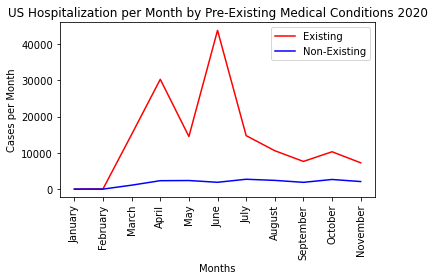

In [65]:
## Create a line graph based on the Pre-Existing Medical Condition (Hospitalization = Yes)
hosexis_avg, = plt.plot(months, prehos_avg_pivot['Yes'], color="red", label="Existing")
hosnon_avg, = plt.plot(months, prehos_avg_pivot['No'], color="blue", label="Non-Existing")

# Set the labels, axes, legend, and title
plt.xticks(tick_locations, months, rotation="vertical")
plt.title("US Hospitalization per Month by Pre-Existing Medical Conditions 2020")
plt.xlabel("Months")
plt.ylabel("Cases per Month")
plt.legend(handles=[hosexis_avg, hosnon_avg], loc="best")

plt.tight_layout()
plt.show()

In [66]:
# Make Data Frame only including columns where Hospitalized is False
ok_patient_premed_df = patient_premed_df[patient_premed_df['Hospitalized'] == "No"]
ok_patient_premed_df.head()

# Create a data frame grouped by Month and Pre-Existing Condition
ok_month_df = ok_patient_premed_df.groupby(["CDC Report Month", "Pre-Existing Condition"])
ok_avg = ok_month_df.count()
ok_avg

# Pivot table for readability and plotting purposes
ok_avg_pivot = ok_avg.pivot_table('Hospitalized', index='CDC Report Month', columns='Pre-Existing Condition')
ok_avg_pivot

Pre-Existing Condition,No,Yes
CDC Report Month,,
January,6,15
February,43,44
March,7191,6888
April,24895,25639
May,34050,36096
June,35769,65864
July,63508,61992
August,65172,50357
September,51835,43331


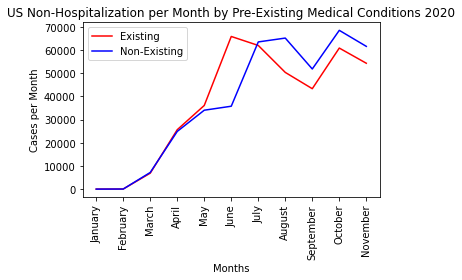

In [64]:
## Create a line graph based on the Pre-Existing Medical Condition (For Non-Hospitalization)
okexis_avg, = plt.plot(months, ok_avg_pivot['Yes'], color="red", label="Existing")
oknon_avg, = plt.plot(months, ok_avg_pivot['No'], color="blue", label="Non-Existing")

# Set the labels, axes, legend, and title
plt.xticks(tick_locations, months, rotation="vertical")
plt.title("US Non-Hospitalization per Month by Pre-Existing Medical Conditions 2020")
plt.xlabel("Months")
plt.ylabel("Cases per Month")
plt.legend(handles=[okexis_avg, oknon_avg], loc="best")

plt.tight_layout()
plt.show()

In [41]:
# Create a data frame grouped by Month and Pre-Existing Condition
pre_month_df = resetCdcDf.groupby(["CDC Report Month", "Pre-Existing Condition"])
pre_month_df.sum()
pre_avg = pre_month_df.sum()
pre_avg


# Pivot table for readability and plotting purposes
pre_avg_pivot = pre_avg.pivot_table('CDC Report Month (#)', index='CDC Report Month', columns='Pre-Existing Condition')
pre_avg_pivot

Pre-Existing Condition,No,Yes
CDC Report Month,,
January,8,20
February,98,196
March,24843,66000
April,108892,223844
May,182120,253135
June,225930,658266
July,463617,537285
August,540688,487688
September,483372,458784


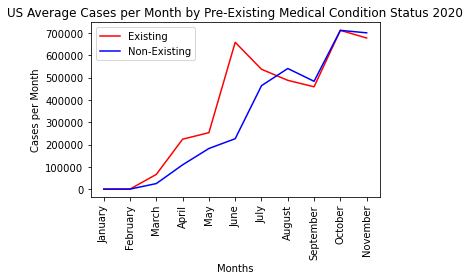

CDC Report Month (#)
CDC Report Month Pre-Existing Condition                      
January          No                                         8
                 Yes                                       20
February         No                                        98
                 Yes                                      196
March            No                                     24843
                 Yes                                    66000
April            No                                    108892
                 Yes                                   223844
May              No                                    182120
                 Yes                                   253135
June             No                                    225930
                 Yes                                   658266
July             No                                    463617
                 Yes                                   537285
August           No                                    540688
                 Yes                                   487688
September        No                                    483372
                 Yes                                   458784
October          No                                    711720
                 Yes                                   711810
November         No                                    700568
                 Yes                                   677391

In [39]:
## Create a line graph based on the Pre-Existing Medical Condition
## This displays the two charts above sumperimposed on eachother
exis_avg, = plt.plot(months, pre_avg_pivot['Yes'], color="red", label="Existing")
non_avg, = plt.plot(months, pre_avg_pivot['No'], color="blue", label="Non-Existing")

# Set the labels, axes, legend, and title
plt.xticks(tick_locations, months, rotation="vertical")
plt.title("US Average Cases per Month by Pre-Existing Medical Condition Status 2020")
plt.xlabel("Months")
plt.ylabel("Cases per Month")
plt.legend(handles=[exis_avg, non_avg], loc="best")

plt.tight_layout()
plt.show()
pre_avg_pivot
pre_avg